In [1]:
import pandas as pd
import numpy as np

import umap
import matplotlib.pyplot as plt

c:\Users\DAHS\anaconda3\envs\Umap_python\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\DAHS\anaconda3\envs\Umap_python\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\DAHS\anaconda3\envs\Umap_python\lib\site-packages\umap\distances.py:108

In [2]:
# matplot setting

plt.rcParams["figure.figsize"] = (10,9)

In [15]:
ori = pd.read_csv('mimic-v_circ12h.csv', index_col = 0)
embset = pd.read_csv('embedding_data.csv', index_col = 0)
embset = embset.rename(columns ={'0.1':'classes'})

In [16]:
# 새롭게 labeling
def class_labeler(df):
    
    data = df.copy()
    
    data['classes'] = 0

    class1 = data[(data['circ_next_12h']==0) & (data['Annotation']=='no_circ')].index
    data.loc[class1,'classes'] = 0
    
    class2 = data[(data['circ_next_12h']==1) & (data['Annotation']=='no_circ')].index
    data.loc[class2,'classes'] = 1
    
    class3 = data[(data['circ_next_12h']==0) & (data['Annotation']=='circ')].index
    data.loc[class3,'classes'] = 2
    
    class4 = data[(data['circ_next_12h']==1) & (data['Annotation']=='circ')].index
    data.loc[class4,'classes'] = 3
    
    data = data.drop(['subject_id', 'stay_id', 'hadm_id', 'Annotation'], axis = 1)
    return data


ori_df = class_labeler(ori)

In [53]:
embset = embset.drop(['subject_id', 'stay_id', 'hadm_id'], axis =1 )
embset_ss = embset.sample(frac=0.5)

In [17]:
ori_ss = ori_df.sample(frac=0.5)
ori_ss.classes.value_counts()

3    143049
0    107471
1     12910
2      3652
Name: classes, dtype: int64

In [18]:
class_ori = ori_ss['classes'].values
reducer_ori = umap.UMAP()
umap_emb_ori = reducer_ori.fit_transform(ori_ss.drop('classes', axis = 1))

c:\Users\DAHS\anaconda3\envs\Umap_python\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [19]:
umap_emb_ori_df = pd.DataFrame(umap_emb_ori, columns = ['component 0', 'component 1'])
umap_emb_ori_df['classes'] = class_ori

In [28]:
umap_emb_ori_df.to_csv('original_data_space.csv')

In [54]:
class_feat = embset_ss['classes'].values
reducer_feat = umap.UMAP()
umap_emb_feat = reducer_feat.fit_transform(embset_ss.drop('classes', axis = 1))

In [55]:
umap_emb_feat_df = pd.DataFrame(umap_emb_feat, columns = ['component 0', 'component 1'])
umap_emb_feat_df['classes'] = class_feat

In [30]:
# umap_emb_feat_df.to_csv('contrastive_data_space.csv')

In [58]:
# umap_emb_feat_df = pd.read_csv('contrastive_data_space.csv')

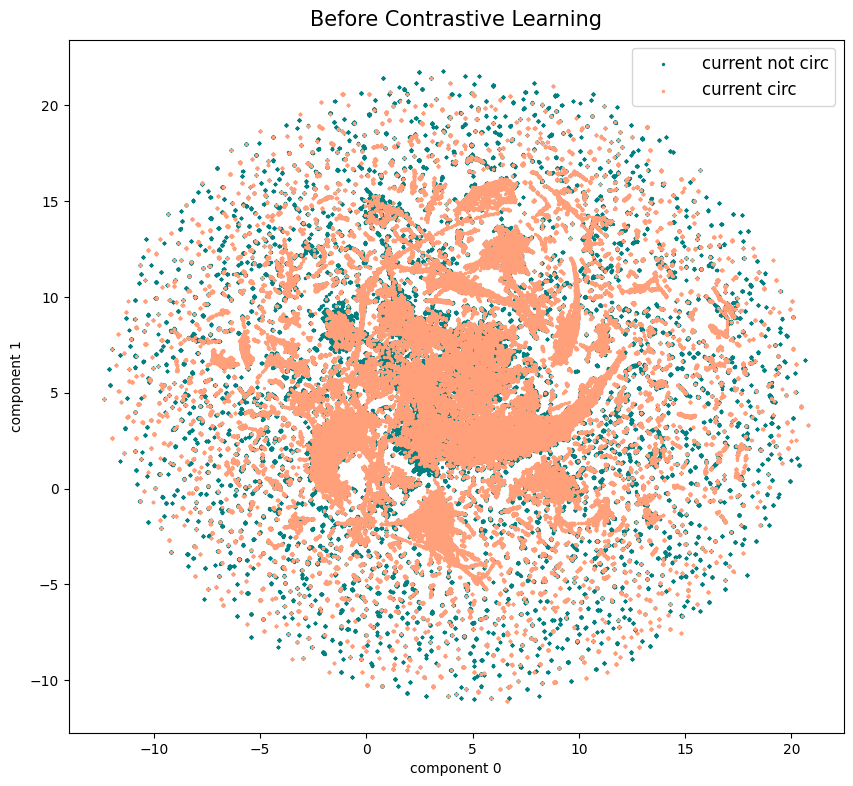

In [70]:
# target 별

# 분리
b_tsne_df_0 = umap_emb_ori_df[umap_emb_ori_df['classes'] == 0]
b_tsne_df_1 = umap_emb_ori_df[umap_emb_ori_df['classes'] == 1]
b_tsne_df_2 = umap_emb_ori_df[umap_emb_ori_df['classes'] == 2]
b_tsne_df_3 = umap_emb_ori_df[umap_emb_ori_df['classes'] == 3]

# target 별 시각화
plt.scatter(b_tsne_df_0['component 0'], b_tsne_df_0['component 1'], color = 'teal', s=2)
plt.scatter(b_tsne_df_1['component 0'], b_tsne_df_1['component 1'], color = 'teal', label = 'current not circ', s=2)
plt.scatter(b_tsne_df_2['component 0'], b_tsne_df_2['component 1'], color = 'lightsalmon', s=2)
plt.scatter(b_tsne_df_3['component 0'], b_tsne_df_3['component 1'], color = 'lightsalmon', label = 'current circ', s=2)

plt.title('Before Contrastive Learning', pad = 10, fontsize=15)
plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend(fontsize=12, handlelength=3)
plt.show()

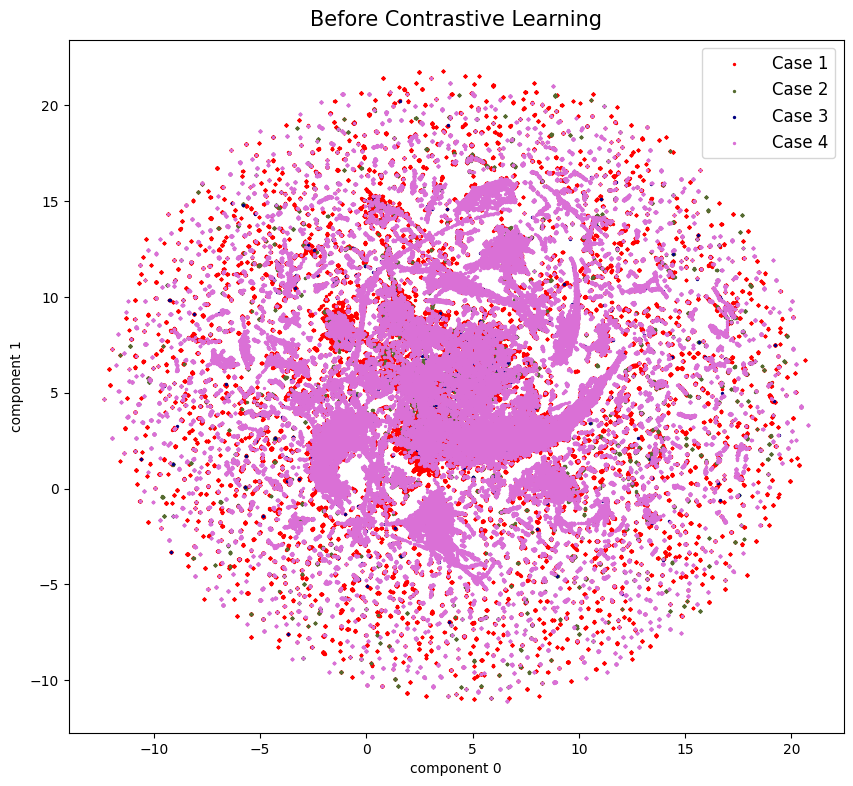

In [83]:
# target 별 시각화
plt.scatter(b_tsne_df_0['component 0'], b_tsne_df_0['component 1'], color = 'red', label = 'Case 1', s = 2)
plt.scatter(b_tsne_df_1['component 0'], b_tsne_df_1['component 1'], color = 'darkolivegreen', label = 'Case 2', s = 2)
plt.scatter(b_tsne_df_2['component 0'], b_tsne_df_2['component 1'], color = 'navy', label = 'Case 3', s = 2)
plt.scatter(b_tsne_df_3['component 0'], b_tsne_df_3['component 1'], color = 'orchid', label = 'Case 4', s = 2)

plt.title('Before Contrastive Learning', pad = 10, fontsize=15)
plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend(fontsize=12, handlelength=3)
plt.show()

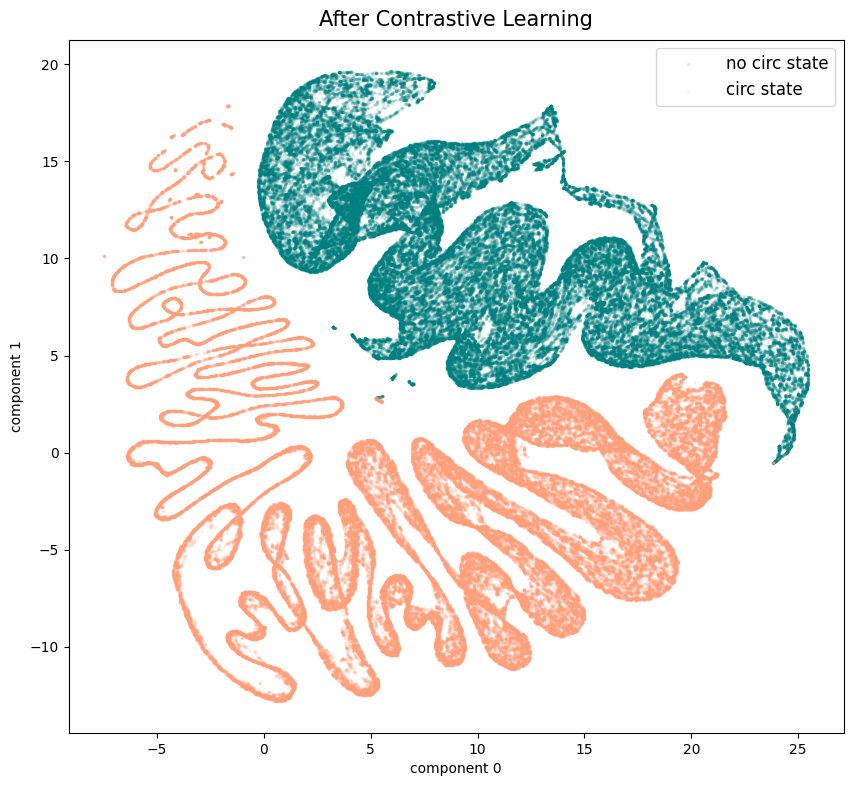

In [84]:
# target 별 분리
c_tsne_df_0 = umap_emb_feat_df[umap_emb_feat_df['classes'] == 0]
c_tsne_df_1 = umap_emb_feat_df[umap_emb_feat_df['classes'] == 1]
c_tsne_df_2 = umap_emb_feat_df[umap_emb_feat_df['classes'] == 2]
c_tsne_df_3 = umap_emb_feat_df[umap_emb_feat_df['classes'] == 3]

# target 별 시각화
plt.scatter(c_tsne_df_0['component 0'], c_tsne_df_0['component 1'], color = 'teal', s = 2, alpha=0.1)
plt.scatter(c_tsne_df_1['component 0'], c_tsne_df_1['component 1'], color = 'teal', label = 'no circ state', s = 2, alpha=0.1)
plt.scatter(c_tsne_df_2['component 0'], c_tsne_df_2['component 1'], color = 'lightsalmon', s = 1, alpha=0.1)
plt.scatter(c_tsne_df_3['component 0'], c_tsne_df_3['component 1'], color = 'lightsalmon', label = 'circ state', s = 2, alpha=0.1)

plt.title('After Contrastive Learning', pad = 10, fontsize=15)
plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend(fontsize=12, handlelength=3)
plt.show()

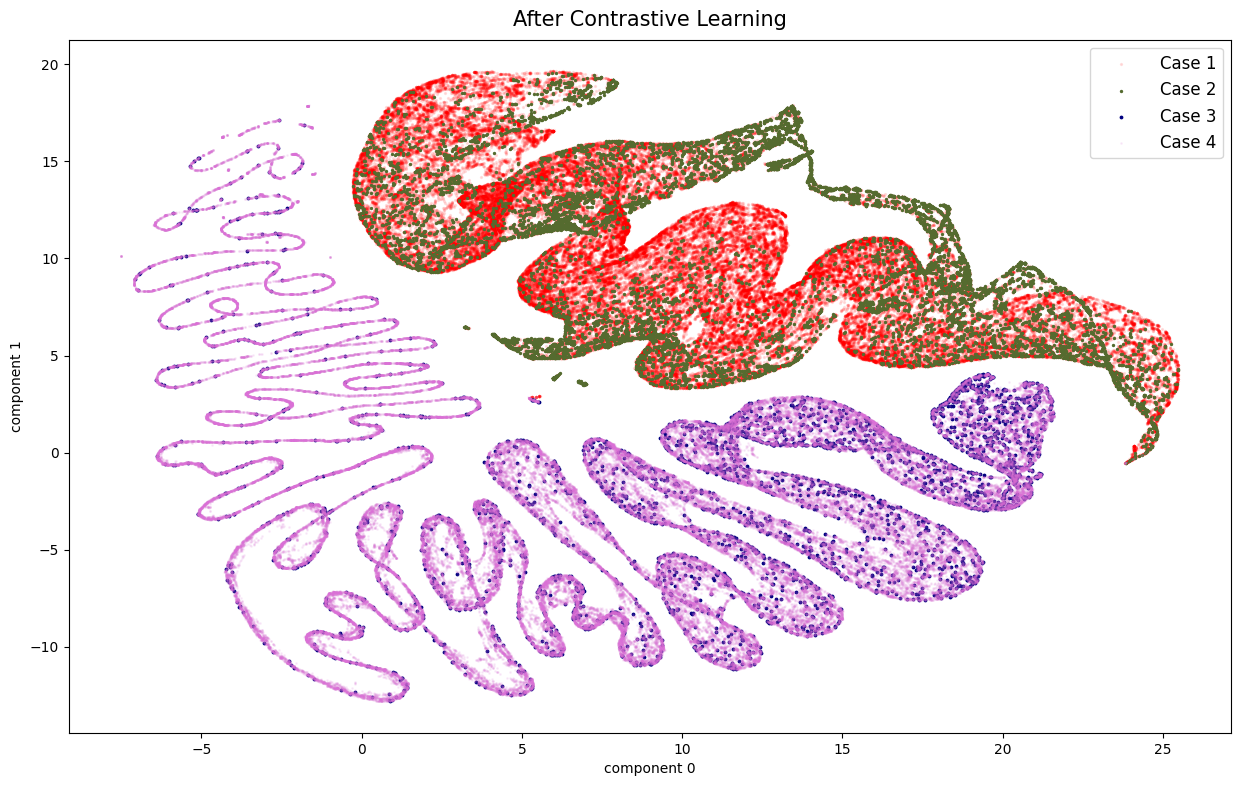

In [89]:
# plt.rcParams["figure.figsize"] = (10,9)
plt.rcParams["figure.figsize"] = (15,9)

# target 별 시각화
plt.scatter(c_tsne_df_0['component 0'], c_tsne_df_0['component 1'], color = 'red', label = 'Case 1', s = 2, alpha=0.1)
plt.scatter(c_tsne_df_1['component 0'], c_tsne_df_1['component 1'], color = 'darkolivegreen', label = 'Case 2', s = 2, alpha=1)
plt.scatter(c_tsne_df_2['component 0'], c_tsne_df_2['component 1'], color = 'navy', label = 'Case 3', s = 3, alpha=1)
plt.scatter(c_tsne_df_3['component 0'], c_tsne_df_3['component 1'], color = 'orchid', label = 'Case 4', s = 1, alpha=0.1)

plt.title('After Contrastive Learning', pad = 10, fontsize=15)
plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend(fontsize=12, handlelength=3)
plt.show()

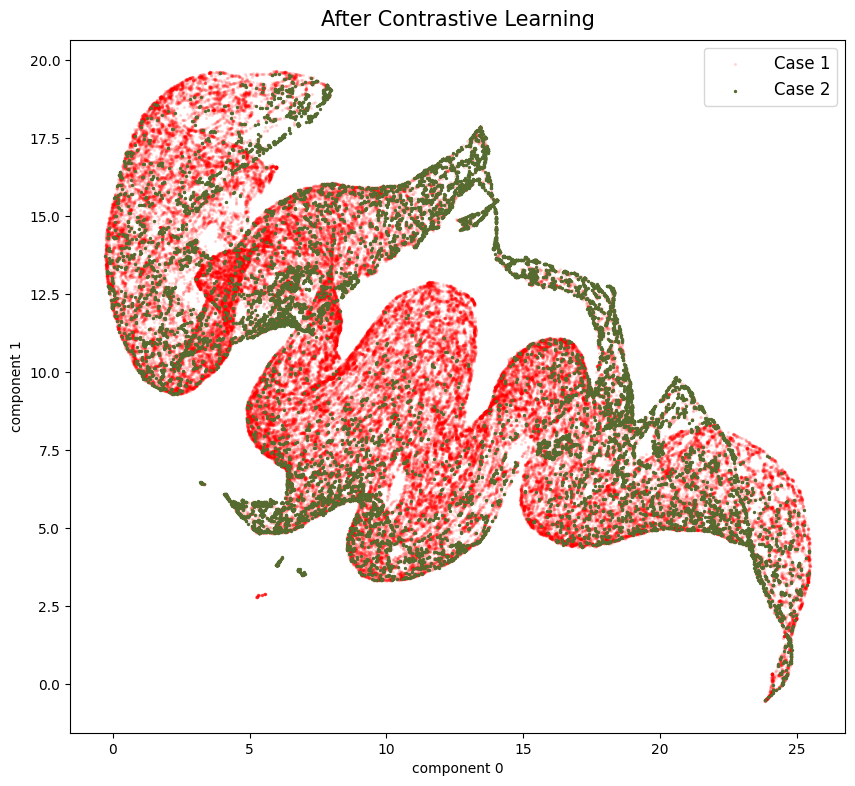

In [86]:
plt.scatter(c_tsne_df_0['component 0'], c_tsne_df_0['component 1'], color = 'red', label = 'Case 1', s = 2, alpha=0.1)
plt.scatter(c_tsne_df_1['component 0'], c_tsne_df_1['component 1'], color = 'darkolivegreen', label = 'Case 2', s = 2, alpha=1)
# plt.scatter(c_tsne_df_2['component 0'], c_tsne_df_2['component 1'], color = 'navy', label = 'Case 3', s = 3, alpha=1)
# plt.scatter(c_tsne_df_3['component 0'], c_tsne_df_3['component 1'], color = 'orchid', label = 'Case 4', s = 1, alpha=0.1)

plt.title('After Contrastive Learning', pad = 10, fontsize=15)
plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend(fontsize=12, handlelength=3)
plt.show()

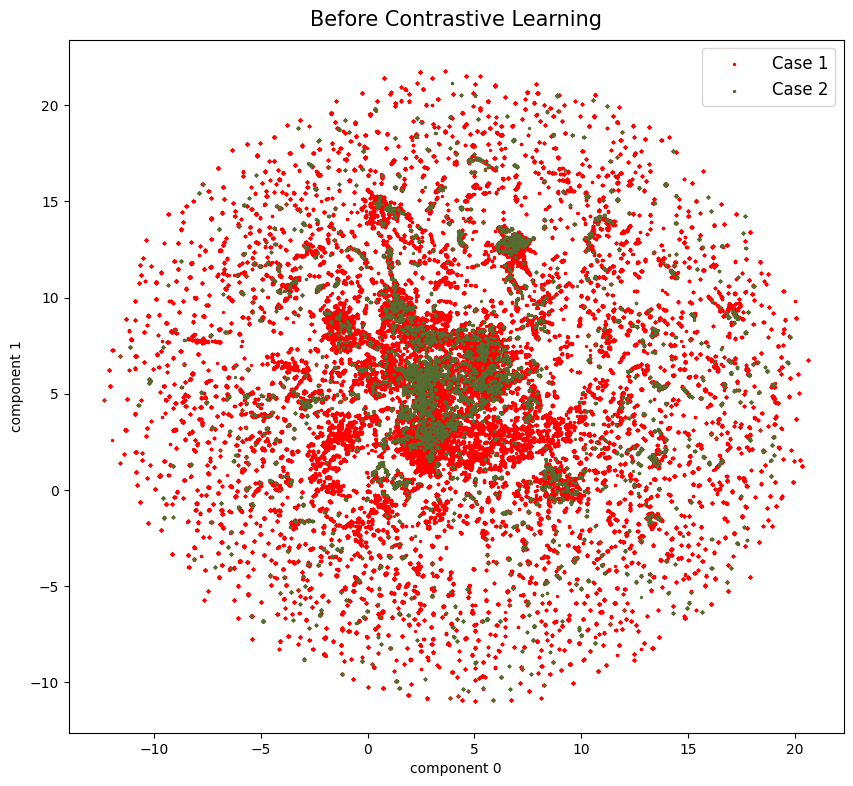

In [87]:
# target 별 시각화
plt.scatter(b_tsne_df_0['component 0'], b_tsne_df_0['component 1'], color = 'red', label = 'Case 1', s = 2)
plt.scatter(b_tsne_df_1['component 0'], b_tsne_df_1['component 1'], color = 'darkolivegreen', label = 'Case 2', s = 2)
# plt.scatter(b_tsne_df_2['component 0'], b_tsne_df_2['component 1'], color = 'navy', label = 'Case 3', s = 2)
# plt.scatter(b_tsne_df_3['component 0'], b_tsne_df_3['component 1'], color = 'orchid', label = 'Case 4', s = 2)

plt.title('Before Contrastive Learning', pad = 10, fontsize=15)
plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend(fontsize=12, handlelength=3)
plt.show()